# Using DataFrame - Spark SQL using Python in Jupyter Notebook

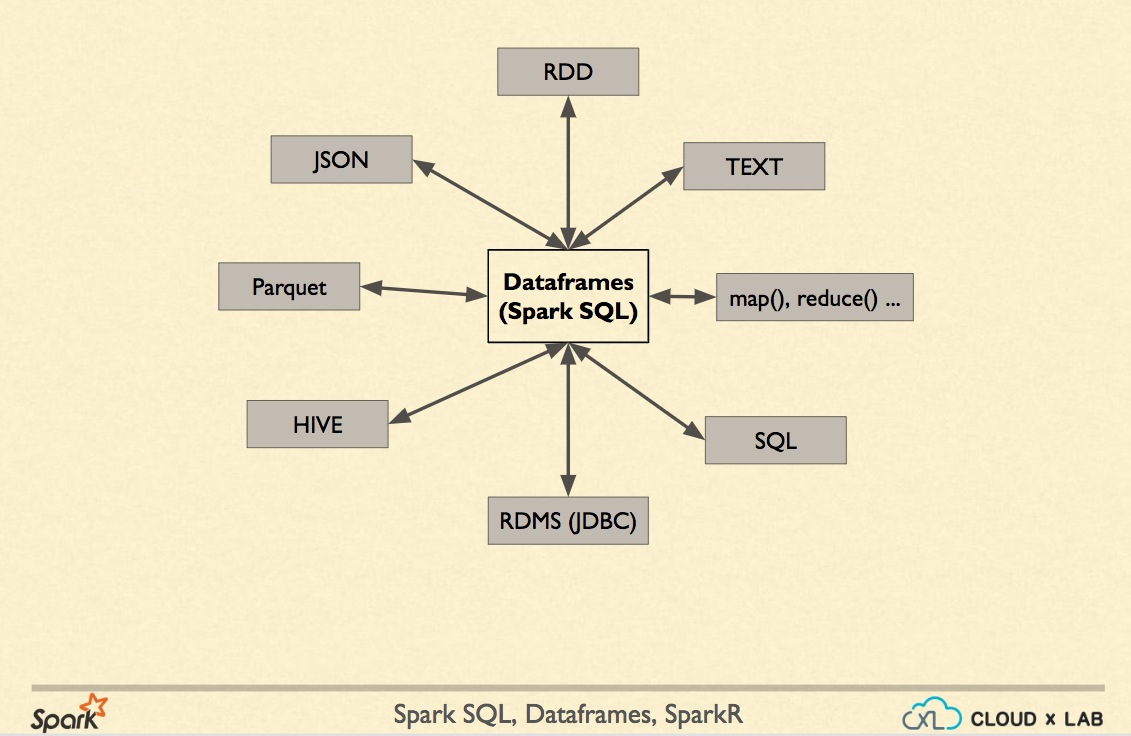

## Initialization

In [1]:
import os
import sys

# Note that the path to spark home could be different for you. This one is for HortonWorks Data Platform
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"

# The version for py4j could be different for you
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# NOTE: Whichever package you want mention here.
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.10:0.4.1 pyspark-shell' 
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0 pyspark-shell'
# com.databricks:spark-avro_2.11:3.2.0
#os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,com.databricks:spark-avro_2.11:3.2.0 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--driver-class-path ~/mysql-connector-java-5.1.36-bin.jar --jars ~/mysql-connector-java-5.1.36-bin.jar --packages com.databricks:spark-xml_2.11:0.6.0,com.databricks:spark-avro_2.11:3.2.0 pyspark-shell'

In [ ]:
# # For spark 2.3
# import os
# import sys
 
# os.environ["SPARK_HOME"] = "/usr/spark2.3/"
# os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# # In below two lines, use /usr/bin/python2.7 if you want to use Python 2
# os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
# os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
# sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
# sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [2]:
# #Entrypoint 1.x

# from pyspark import SparkContext, SparkConf
# conf = SparkConf().setAppName("appName")
# sc = SparkContext(conf=conf)

In [2]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().getOrCreate()
# specify .master("yarn")

## Hive Connectivite Check

In [10]:
spark.sql("show databases").show()

+------------------+
|      databaseName|
+------------------+
|             400bc|
|             a_vis|
|               abc|
|              abc1|
|              abc2|
|           abhinav|
|adarshbhoodhoo5510|
|             adi15|
|            aditya|
|     aduri1ram4183|
|        afarir4475|
|          aishboom|
|          ajaydb_1|
|         ajaydb_x1|
|   aleinsteinr2621|
|  alokdeosingh1995|
|alokpandey09933735|
|   amankisku931845|
|                an|
|ansarirahamath7347|
+------------------+
only showing top 20 rows



## Loading XML

In [11]:
!hadoop fs -cat /data/spark/books.xml

<?xml version="1.0"?>
<catalog>
   <book id="bk101">
      <author>Gambardella, Matthew</author>
      <title>XML Developer's Guide</title>
      <genre>Computer</genre>
      <price>44.95</price>
      <publish_date>2000-10-01</publish_date>
      <description>


         An in-depth look at creating applications
         with XML.This manual describes Oracle XML DB, and how you can use it to store, generate, manipulate, manage,
         and query XML data in the database.


         After introducing you to the heart of Oracle XML DB, namely the XMLType framework and Oracle XML DB repository,
         the manual provides a brief introduction to design criteria to consider when planning your Oracle XML DB
         application. It provides examples of how and where you can use Oracle XML DB.


         The manual then describes ways you can store and retrieve XML data using Oracle XML DB, APIs for manipulating
         XMLType data, and ways you can view, generate, transform, and searc

In [3]:
df = spark.read.format("xml").option("rowTag", "book").load("/data/spark/books.xml")

In [4]:
df.show()

+-----+--------------------+--------------------+---------------+-----+------------+--------------------+
|  _id|              author|         description|          genre|price|publish_date|               title|
+-----+--------------------+--------------------+---------------+-----+------------+--------------------+
|bk101|Gambardella, Matthew|


         An in...|       Computer|44.95|  2000-10-01|XML Developer's G...|
|bk102|          Ralls, Kim|A former architec...|        Fantasy| 5.95|  2000-12-16|       Midnight Rain|
|bk103|         Corets, Eva|After the collaps...|        Fantasy| 5.95|  2000-11-17|     Maeve Ascendant|
|bk104|         Corets, Eva|In post-apocalyps...|        Fantasy| 5.95|  2001-03-10|     Oberon's Legacy|
|bk105|         Corets, Eva|The two daughters...|        Fantasy| 5.95|  2001-09-10|  The Sundered Grail|
|bk106|    Randall, Cynthia|When Carla meets ...|        Romance| 4.95|  2000-09-02|         Lover Birds|
|bk107|      Thurman, Paula|A deep sea diver .

## Loading JSON DATA

In [3]:
!hadoop fs -cat /data/spark/people.json

{"name":"Michael"}
{"name":"Andy", "age":30}
{"name":"Justin", "age":19}


In [3]:
df = spark.read.json("/data/spark/people.json")

In [15]:
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



## Dataframe Operations

In [19]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [20]:
df.select("name").show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [8]:
df.filter("age > 21").show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [11]:
df.groupBy("age").count().show()

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|null|    1|
|  30|    1|
+----+-----+



## Using SQL

In [12]:
df.createOrReplaceTempView("people")

In [14]:
sqlDF = spark.sql("SELECT * FROM people")
sqlDF.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



## Inferring the Schema Using Reflection

In [16]:
from pyspark.sql.types import Row

sc = spark.sparkContext
textRDD = sc.textFile("/data/spark/people.txt")

arrayRDD = textRDD.map(lambda x: x.split(","))

rowRDD = arrayRDD.map(lambda arr: Row(name=arr[0], age=int(arr[1].strip())))

peopleDF = rowRDD.toDF()
peopleDF.show()


+---+-------+
|age|   name|
+---+-------+
| 29|Michael|
| 30|   Andy|
| 19| Justin|
+---+-------+



In [17]:
# Register the DataFrame as a temporary view
peopleDF.createOrReplaceTempView("people")

# SQL statements can be run by using the sql methods provided by Spark
teenagersDF = spark.sql("SELECT * FROM people WHERE age BETWEEN 13 AND 19")
teenagersDF.show()

teenagersDF.rdd.map(lambda teenager: "Name: " + str(teenager[1])).collect()

#[u'Name: Justin']




+---+------+
|age|  name|
+---+------+
| 19|Justin|
+---+------+



['Name: Justin']

## Programmatically Specifying the Schema

In [19]:
# Creating Rows RDD
filename = "/data/spark/people.txt"
peopleRDD = spark.sparkContext.textFile(filename)
peopleRDD.take(10)

['Michael, 29', 'Andy, 30', 'Justin, 19']

In [28]:
from pyspark.sql import *
from pyspark.sql.types import *
# The schema is encoded in a string. User provided variable
schemaString = "name age"
fieldsArray = schemaString.split(" ")
fields = list(map(lambda f: StructField(f, StringType(), nullable = True),
fieldsArray))
schema = StructType(fields)


In [30]:
schema

StructType(List(StructField(name,StringType,true),StructField(age,StringType,true)))

In [31]:
arrRDD = peopleRDD.map(lambda x: x.split(","))
rowRDD = arrRDD.map(lambda attr: Row(attr[0], attr[1]))


In [32]:
rowRDD.take(10)

[<Row(Michael,  29)>, <Row(Andy,  30)>, <Row(Justin,  19)>]

In [33]:
# Creating Dataframe
peopleDF = spark.createDataFrame(rowRDD, schema)
peopleDF.show()

+-------+---+
|   name|age|
+-------+---+
|Michael| 29|
|   Andy| 30|
| Justin| 19|
+-------+---+



## Reading Data from AVRO format

In [4]:
df = spark.read.format("com.databricks.spark.avro").load("/data/spark/episodes.avro")

In [6]:
df.show()

+--------------------+----------------+------+
|               title|        air_date|doctor|
+--------------------+----------------+------+
|   The Eleventh Hour|    3 April 2010|    11|
|   The Doctor's Wife|     14 May 2011|    11|
| Horror of Fang Rock|3 September 1977|     4|
|  An Unearthly Child|23 November 1963|     1|
|The Mysterious Pl...|6 September 1986|     6|
|                Rose|   26 March 2005|     9|
|The Power of the ...| 5 November 1966|     2|
|          Castrolava|  4 January 1982|     5|
+--------------------+----------------+------+



## Handling Parquet

In [7]:
# Reading
df = spark.read.load("/data/spark/users.parquet")

df.show()

+------+--------------+----------------+
|  name|favorite_color|favorite_numbers|
+------+--------------+----------------+
|Alyssa|          null|  [3, 9, 15, 20]|
|   Ben|           red|              []|
+------+--------------+----------------+



In [9]:
# Writing
df = spark.read.format("json").load("/data/spark/people.json")
df1 = df.select("name", "age")
df1.write.format("parquet").save("namesAndAges")


In [10]:
spark.read.load("namesAndAges").show()

+-------+----+
|   name| age|
+-------+----+
|Michael|null|
|   Andy|  30|
| Justin|  19|
+-------+----+



In [11]:
## Automatically (parquet unless otherwise configured)

df = spark.read.load("/data/spark/users.parquet")
df1 = df.select("name", "favorite_color")
df1.write.save("namesAndFavColors")


In [12]:
spark.read.load("namesAndFavColors").show()

+------+--------------+
|  name|favorite_color|
+------+--------------+
|Alyssa|          null|
|   Ben|           red|
+------+--------------+



## Reading file using spark SQL

In [14]:
sqlDF = spark.sql("SELECT * FROM parquet.`/data/spark/users.parquet`")
sqlDF.show()

+------+--------------+----------------+
|  name|favorite_color|favorite_numbers|
+------+--------------+----------------+
|Alyssa|          null|  [3, 9, 15, 20]|
|   Ben|           red|              []|
+------+--------------+----------------+



In [15]:
sqlDF = spark.sql("SELECT * FROM json.`/data/spark/people.json`")
sqlDF.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



## Comparing File Sizes - XML vs JSON vs Parquet


In [20]:
!hadoop fs -rmr nasa_data_parquet


rmr: DEPRECATED: Please use 'rm -r' instead.
19/08/26 17:51:06 INFO fs.TrashPolicyDefault: Moved: 'hdfs://cxln1.c.thelab-240901.internal:8020/user/sandeepgiri9034/nasa_data_parquet' to trash at: hdfs://cxln1.c.thelab-240901.internal:8020/user/sandeepgiri9034/.Trash/Current/user/sandeepgiri9034/nasa_data_parquet1566841866543


In [21]:
!hadoop fs -rmr nasa_data_json


rmr: DEPRECATED: Please use 'rm -r' instead.
19/08/26 17:51:10 INFO fs.TrashPolicyDefault: Moved: 'hdfs://cxln1.c.thelab-240901.internal:8020/user/sandeepgiri9034/nasa_data_json' to trash at: hdfs://cxln1.c.thelab-240901.internal:8020/user/sandeepgiri9034/.Trash/Current/user/sandeepgiri9034/nasa_data_json


In [ ]:
# Loaded the XML file
df = spark.read.format("xml").option("rowtag", "dataset").load("/data/spark/nasa.xml")

# Saved as Parquet
df.write.format("parquet").save("nasa_data_parquet")
# Saved as JSON
df.write.json("nasa_data_json")

# Test reading
df = spark.read.parquet("nasa_data_parquet/")
df.show()

In [23]:
## Check Sizes
# XML
!hadoop fs -ls -h /data/spark/nasa.xml

-rw-r--r--   3 sandeepgiri9034 hdfs     23.9 M 2019-08-22 09:00 /data/spark/nasa.xml


In [24]:
!hadoop fs -ls -h nasa_data_parquet

Found 2 items
-rw-r--r--   3 sandeepgiri9034 sandeepgiri9034          0 2019-08-26 17:51 nasa_data_parquet/_SUCCESS
-rw-r--r--   3 sandeepgiri9034 sandeepgiri9034      2.4 M 2019-08-26 17:51 nasa_data_parquet/part-00000-f7412ed8-cb18-4d7b-ad54-9ff10457d40b.snappy.parquet


In [25]:
!hadoop fs -ls -h nasa_data_json

Found 2 items
-rw-r--r--   3 sandeepgiri9034 sandeepgiri9034          0 2019-08-26 17:51 nasa_data_json/_SUCCESS
-rw-r--r--   3 sandeepgiri9034 sandeepgiri9034      7.7 M 2019-08-26 17:51 nasa_data_json/part-00000-26974870-8b06-47f8-a049-a13a45a43682.json


## Hive

In [ ]:
def q(s): spark.sql(s).show()

q("create database sandeepgiri9034")


In [32]:
#TODO: Please use your own database name
q("use sandeepgiri9034")
q("show tables")

++
||
++
++

+---------------+----------+-----------+
|       database| tableName|isTemporary|
+---------------+----------+-----------+
|sandeepgiri9034|    m_data|      false|
|sandeepgiri9034|msprojects|      false|
|sandeepgiri9034|      nyse|      false|
|sandeepgiri9034|   top100m|      false|
|sandeepgiri9034|    u_data|      false|
|sandeepgiri9034|   widgets|      false|
|sandeepgiri9034|         x|      false|
+---------------+----------+-----------+



In [31]:
q("drop table x")
q("create table x(a int, b varchar(10))")
q("show tables")
q("insert into x values(1, 'sandeep')")
q("insert into x values(2, 'giri')")
q("select * from x")

++
||
++
++

++
||
++
++

+---------------+----------+-----------+
|       database| tableName|isTemporary|
+---------------+----------+-----------+
|sandeepgiri9034|    m_data|      false|
|sandeepgiri9034|msprojects|      false|
|sandeepgiri9034|      nyse|      false|
|sandeepgiri9034|   top100m|      false|
|sandeepgiri9034|    u_data|      false|
|sandeepgiri9034|   widgets|      false|
|sandeepgiri9034|         x|      false|
+---------------+----------+-----------+

++
||
++
++

++
||
++
++

+---+-------+
|  a|      b|
+---+-------+
|  1|sandeep|
|  2|   giri|
+---+-------+



## SQL Databases

The below code works in pyspark console but not yet working in the jupyter notebook.

In [7]:
#On The shell:
# !hadoop fs -get /data/spark/mysql-connector-java-5.1.36-bin.jar ~/

get: `/home/sandeepgiri9034/mysql-connector-java-5.1.36-bin.jar': File exists


In [ ]:
# pyspark --driver-class-path mysql-connector-java-5.1.36-bin.jar --jars ~/mysql-connector-java-5.1.36-bin.jar

In [5]:
# jdbcDF = spark.read.format("jdbc") \
# .option("url", "jdbc:mysql://10.142.1.2/sqoopex")\
# .option("dbtable", "widgets")\
# .option("user", "sqoopuser")\
# .option("password", "NHkkP876rp")\
# .load()

# jdbcDF.show()


Py4JJavaError: An error occurred while calling o58.load.
: java.sql.SQLException: No suitable driver
	at java.sql.DriverManager.getDriver(DriverManager.java:315)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions$$anonfun$7.apply(JDBCOptions.scala:84)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions$$anonfun$7.apply(JDBCOptions.scala:84)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:83)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:34)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:32)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:330)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:152)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:125)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
